In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
wine_data = pd.read_csv('winequality-red.csv')


In [32]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


5.6360225140712945


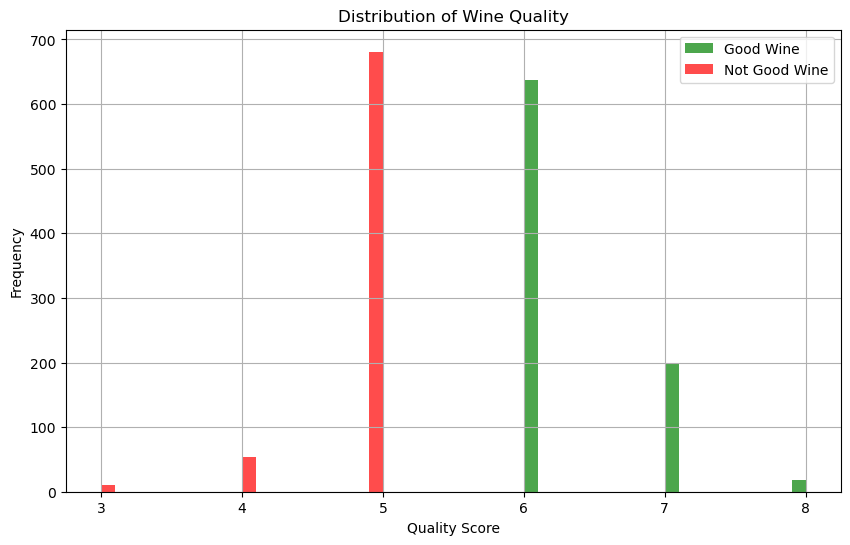

Accuracy of the model: 0.778125


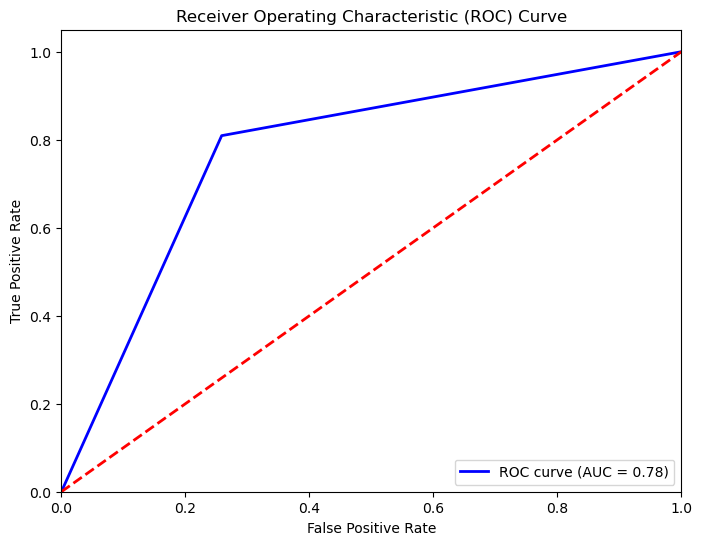

In [45]:
average_quality = wine_data['quality'].mean()
print(average_quality)

good_wine = wine_data[wine_data['quality'] >= average_quality]
not_good_wine = wine_data[wine_data['quality'] < average_quality]
plt.figure(figsize=(10, 6))


plt.hist(good_wine['quality'], bins=20, color='green', alpha=0.7, label='Good Wine')


plt.hist(not_good_wine['quality'], bins=20, color='red', alpha=0.7, label='Not Good Wine')

plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

wine_data['quality_label'] = (wine_data['quality'] >= average_quality).astype(int)


X = wine_data.drop(['quality', 'quality_label'], axis=1)
y = wine_data['quality_label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


classifier = DecisionTreeClassifier(random_state=40)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()